In [187]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [188]:
# 1- read data file
# 1- read processed file
file_dir = '../data/processed-data/'

data_file = 'standardized_normalized_dataset.csv'

data = pd.read_csv(file_dir + data_file)

In [190]:
data.head(5)

,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate,ltcy
0,-2.397,-1.146,-2.165,-2.248,-1.571,-1.348,-2.094,-1.754,-1.289,-1.485,-1.998,0.332
1,-2.193,-1.270,-2.052,-2.129,-1.570,-1.347,-2.030,-1.672,-1.230,-1.485,-1.928,0.400
2,-2.221,-1.206,-2.008,-2.227,-1.571,-1.365,-2.023,-1.607,-1.181,-1.485,-1.866,0.469
3,-2.165,-1.270,-2.007,-1.404,-1.571,-1.337,-2.037,-1.624,-1.198,-1.709,-1.872,0.490
4,-2.221,-1.206,-1.955,-1.105,-1.571,-1.321,-2.049,-1.616,-1.192,-2.379,-1.862,0.500


## Function to build a model

In [189]:
# define the model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    # or loss='mean_absolute_percentage_error'
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

def medium_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [191]:
targets = data['ltcy']
inputs = data.drop(['ltcy'], axis=1)

x_train, x_test, y_train, y_test = \
    train_test_split(inputs, targets, test_size=0.2, random_state=365)

# for better convergence and result scale target to values between 0 - 1
maxltcy = targets.max()
y_train = y_train / maxltcy
y_test = y_test / maxltcy


In [192]:
estimators = []
##estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=20, batch_size=5, verbose=1, shuffle=False)))
pipeline = Pipeline(estimators)

kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_train , y_train, cv=kfold)

print ("Done..!")


Epoch 1/20
1140/1140 [==============================] - 7s 6ms/step - loss: 0.1949
Epoch 2/20
1140/1140 [==============================] - 1s 639us/step - loss: 0.0239
Epoch 3/20
1140/1140 [==============================] - 1s 697us/step - loss: 0.0174
Epoch 4/20
1140/1140 [==============================] - 1s 768us/step - loss: 0.0160
Epoch 5/20
1140/1140 [==============================] - 1s 760us/step - loss: 0.0156
Epoch 6/20
1140/1140 [==============================] - 1s 769us/step - loss: 0.0154
Epoch 7/20
1140/1140 [==============================] - 1s 808us/step - loss: 0.0152
Epoch 8/20
1140/1140 [==============================] - 1s 834us/step - loss: 0.0151
Epoch 9/20
1140/1140 [==============================] - 1s 779us/step - loss: 0.0150
Epoch 10/20
1140/1140 [==============================] - 1s 704us/step - loss: 0.0149
Epoch 11/20
1140/1140 [==============================] - 1s 778us/step - loss: 0.0149
Epoch 12/20
1140/1140 [==============================] - 1s 850us

Epoch 14/20
1140/1140 [==============================] - 1s 766us/step - loss: 0.0145
Epoch 15/20
1140/1140 [==============================] - 1s 848us/step - loss: 0.0145
Epoch 16/20
1140/1140 [==============================] - 1s 821us/step - loss: 0.0144
Epoch 17/20
1140/1140 [==============================] - 1s 697us/step - loss: 0.0144
Epoch 18/20
1140/1140 [==============================] - 1s 808us/step - loss: 0.0144
Epoch 19/20
1140/1140 [==============================] - 1s 719us/step - loss: 0.0143
Epoch 20/20
127/127 [==============================] - 3s 22ms/step
Epoch 1/20
1140/1140 [==============================] - 9s 8ms/step - loss: 0.1873
Epoch 2/20
1140/1140 [==============================] - 1s 897us/step - loss: 0.0243
Epoch 3/20
1140/1140 [==============================] - 1s 934us/step - loss: 0.0172
Epoch 4/20
1140/1140 [==============================] - 1s 875us/step - loss: 0.0158
Epoch 5/20
1140/1140 [==============================] - 1s 909us/step - loss: 

1141/1141 [==============================] - 1s 817us/step - loss: 0.0153
Epoch 7/20
1141/1141 [==============================] - 1s 923us/step - loss: 0.0151
Epoch 8/20
1141/1141 [==============================] - 1s 862us/step - loss: 0.0151
Epoch 9/20
1141/1141 [==============================] - 1s 1ms/step - loss: 0.0150
Epoch 10/20
1141/1141 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 11/20
1141/1141 [==============================] - 1s 1ms/step - loss: 0.0148
Epoch 12/20
1141/1141 [==============================] - 1s 984us/step - loss: 0.0148
Epoch 13/20
1141/1141 [==============================] - 1s 970us/step - loss: 0.0147
Epoch 14/20
1141/1141 [==============================] - 1s 903us/step - loss: 0.0146
Epoch 15/20
1141/1141 [==============================] - 1s 1ms/step - loss: 0.0146
Epoch 16/20
1141/1141 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 17/20
1141/1141 [==============================] - 1s 972us/step - loss: 

Text(0, 0.5, 'mean_squared_error')

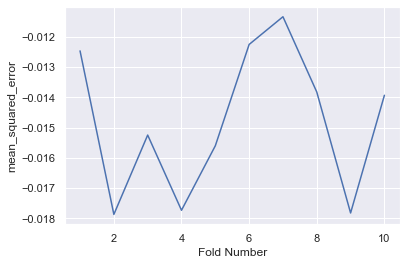

In [208]:
folds = range(1, results.size + 1)

plt.plot( folds , results)
plt.xlabel('Fold Number')
plt.ylabel('mean_squared_error')


In [209]:
regressor = pipeline.named_steps.mlp
print("Model Result (mean and std of error): %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model Result (mean and std of error): -0.01 (0.00) MSE


In [210]:
regressor.fit(x_train, y_train)
y_hat = regressor.predict(x_train)
y_hat = pd.Series(y_hat)
y_hat.head()

Epoch 1/20
1267/1267 [==============================] - 9s 7ms/step - loss: 0.1523
Epoch 2/20
1267/1267 [==============================] - 1s 866us/step - loss: 0.0203
Epoch 3/20
1267/1267 [==============================] - 1s 878us/step - loss: 0.0161
Epoch 4/20
1267/1267 [==============================] - 1s 910us/step - loss: 0.0154
Epoch 5/20
1267/1267 [==============================] - 1s 884us/step - loss: 0.0152
Epoch 6/20
1267/1267 [==============================] - 1s 944us/step - loss: 0.0151
Epoch 7/20
1267/1267 [==============================] - 1s 883us/step - loss: 0.0150
Epoch 8/20
1267/1267 [==============================] - 1s 921us/step - loss: 0.0149
Epoch 9/20
1267/1267 [==============================] - 1s 875us/step - loss: 0.0149
Epoch 10/20
1267/1267 [==============================] - 1s 965us/step - loss: 0.0148
Epoch 11/20
1267/1267 [==============================] - 1s 877us/step - loss: 0.0147
Epoch 12/20
1267/1267 [==============================] - 1s 930us

0   0.637
1   0.494
2   0.471
3   0.641
4   0.700
dtype: float32

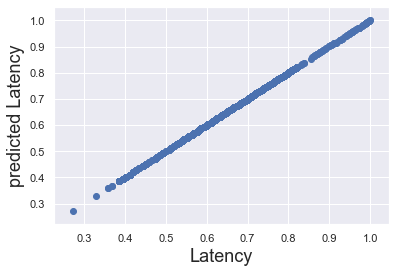

In [211]:
plt.scatter(y_train, y_train)
plt.xlabel('Latency', size=18)
plt.ylabel("predicted Latency", size=18)
#plt.xlim(-2,3)
#plt.ylim(-3,1)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

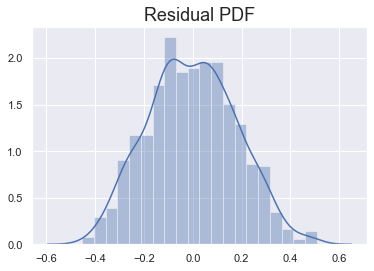

In [212]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [213]:
train_error =  np.abs(y_train - y_hat)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

print("Model Result (mean and std of error): %.2f (%.2f) MSE" % (mean_error, std_error))

Model Result (mean and std of error): 0.15 (0.10) MSE


### Testing

In [214]:
y_hat_test = regressor.predict(x_test)
y_hat_test = pd.Series(y_hat_test)
y_test_hat.head()

317/317 [==============================] - 0s 819us/step


0   0.443
1   0.433
2   0.418
3   0.449
4   0.452
dtype: float32

<function matplotlib.pyplot.show(*args, **kw)>

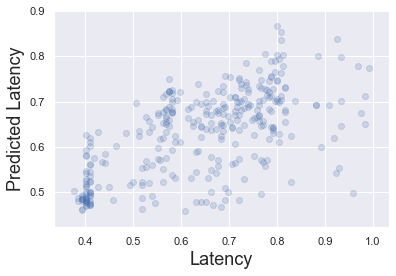

In [215]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Latency', size=18)
plt.ylabel('Predicted Latency', size=18)
plt.show

In [216]:
perf = pd.DataFrame(np.exp(y_hat_test), columns=['prediction'])
y_test = y_test.reset_index(drop=True)
perf['target'] = np.exp(y_test)
perf.head()

,prediction,target
0,1.918,1.767
1,1.991,1.778
2,1.740,1.682
3,1.966,2.266
4,2.059,1.819


In [217]:
perf['residual'] = perf['prediction'] - perf['target']
perf['difference%'] = np.absolute(perf['residual'] * 100 / perf['target'])
perf

,prediction,target,residual,difference%
0,1.918,1.767,0.151,8.517
1,1.991,1.778,0.213,11.984
2,1.740,1.682,0.058,3.466
3,1.966,2.266,-0.299,13.211
4,2.059,1.819,0.240,13.174
...,...,...,...,...
312,2.170,2.700,-0.530,19.617
313,1.947,2.134,-0.186,8.729
314,2.078,2.266,-0.188,8.283
315,1.843,2.238,-0.394,17.618


In [218]:
perf.describe()

,prediction,target,residual,difference%
count,317.000,317.000,317.000,317.000
mean,1.885,1.921,-0.036,9.272
std,0.177,0.292,0.231,6.628
min,1.581,1.457,-0.963,0.087
25%,1.727,1.704,-0.165,4.107
50%,1.910,1.940,0.002,8.478
75%,2.013,2.143,0.133,13.284
max,2.380,2.700,0.377,36.908


In [219]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
perf.sort_values(by = ['difference%'])

,prediction,target,residual,difference%
144,2.20,2.20,0.00,0.09
249,2.04,2.04,-0.00,0.12
278,2.09,2.09,0.00,0.13
87,1.99,1.99,-0.00,0.16
117,1.68,1.68,0.00,0.19
138,2.03,2.04,-0.00,0.23
73,1.91,1.90,0.01,0.27
287,2.23,2.23,0.01,0.28
212,1.98,1.97,0.01,0.35
94,1.96,1.97,-0.01,0.36
